# Credit card customer analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/BankChurners.csv',header=0)

## Part 1: Data Exploration and Preprocessing
- Data Understanding: 
    - Load the dataset and perform an initial exploration to understand its structure, 
    - identify missing values, and gather basic statistics.
- Preprocessing: Clean the dataset by handling missing values, outliers, and any erroneous data points. Document your decisions.


In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
del df['CLIENTNUM']

In [7]:
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']

In [8]:
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [9]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- No missing values in the data

## Outliers treatment

In [13]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


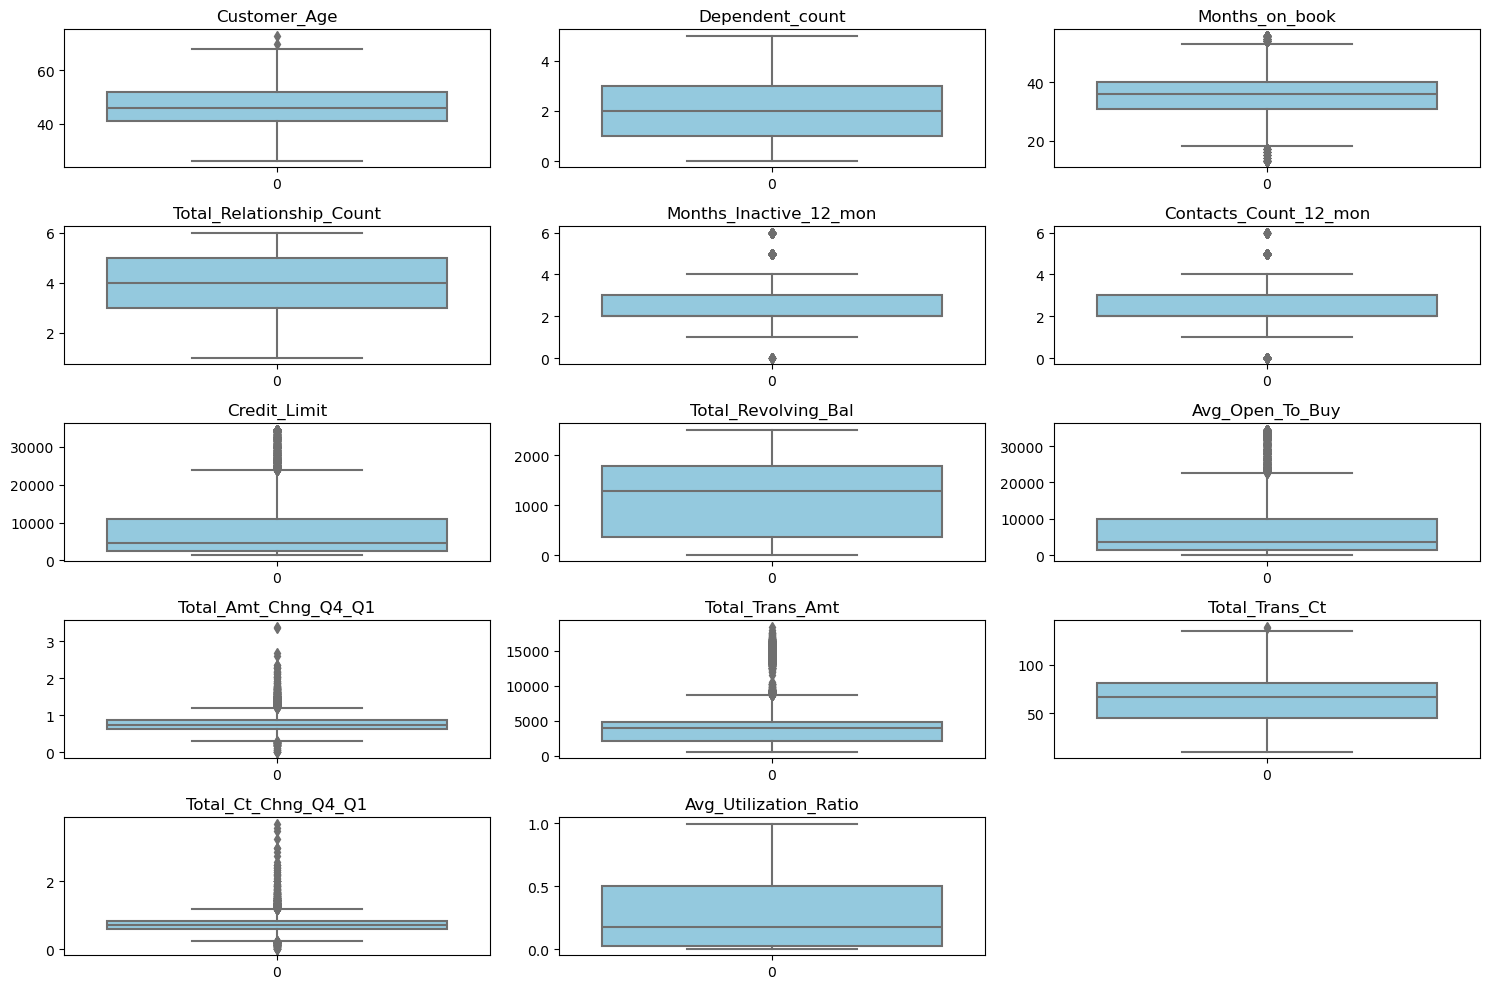

In [14]:
columns_to_visualize = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

# Create box plots for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize, start=1):
    plt.subplot(5, 3, i)
    sns.boxplot(df[col], color='skyblue')
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()

In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clip values to the bounds
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))

# Specify the columns to process
columns_to_process = [
    'Customer_Age', 
    'Months_on_book', 
    'Months_Inactive_12_mon', 
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt', 
    'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1'
]

# Apply the outlier removal function to the specified columns
for col in columns_to_process:
    if col in df.columns:  # Ensure the column exists in the dataset
        remove_outliers_iqr(df, col)


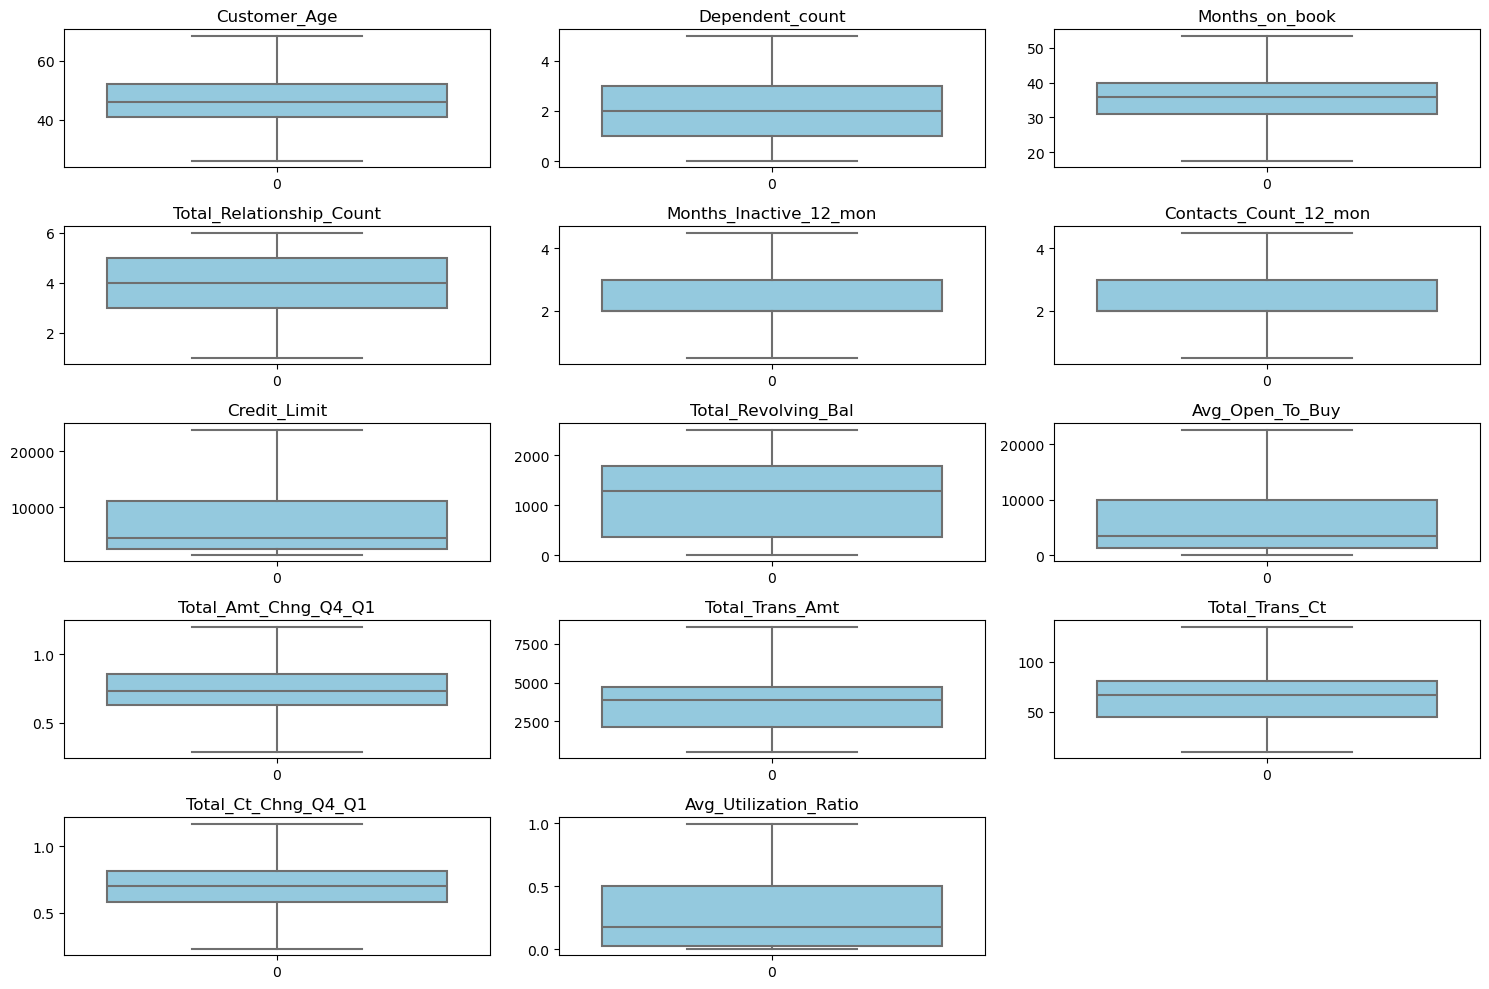

In [16]:
columns_to_visualize = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

# Create box plots for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize, start=1):
    plt.subplot(5, 3, i)
    sns.boxplot(df[col], color='skyblue')
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()

## Part 2: Data Analysis and Visualization
- Customer Demographics Analysis: 
    - Analyze the demographics of the credit card holders (e.g., age, salary, marital status) and visualize the distributions.
- Credit Usage Analysis: 
    - Explore how different demographics correlate with credit card limit, balance, and category. Identify any interesting patterns.

<Axes: xlabel='Attrition_Flag', ylabel='count'>

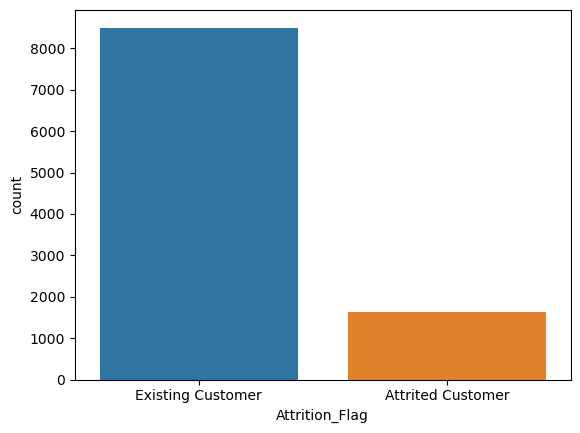

In [18]:
sns.countplot(x='Attrition_Flag', data =df)

- The dataset is highly imbalanced

C:\Users\HARISH\AppData\Local\Temp\ipykernel_15304\2579352981.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


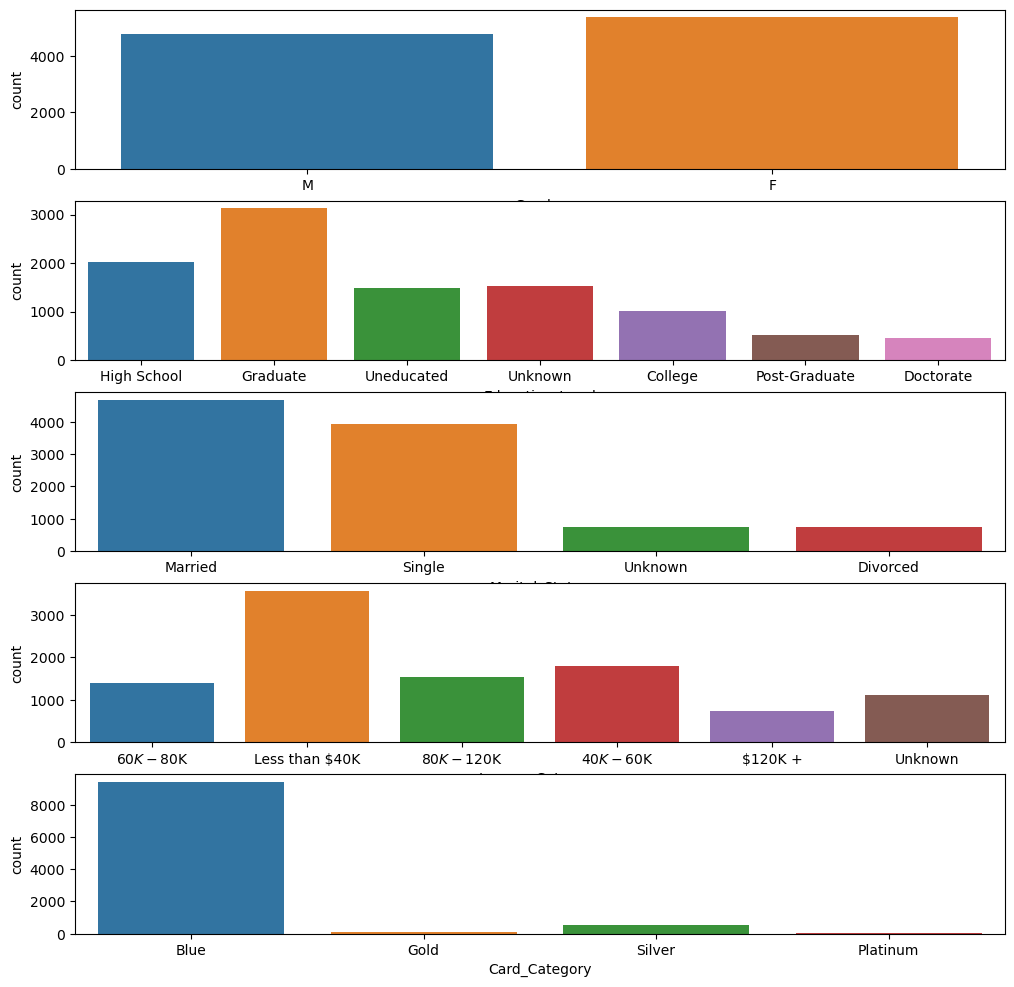

In [20]:
fig, axis= plt.subplots(5,1,figsize=(12,12))
sns.countplot(x=df['Gender'],ax=axis[0])
sns.countplot(x=df['Education_Level'],ax=axis[1])
sns.countplot(x=df['Marital_Status'],ax=axis[2])
sns.countplot(x=df['Income_Category'],ax=axis[3])
sns.countplot(x=df['Card_Category'],ax=axis[4])
fig.show()

## Dummy variable creation

In [22]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45.0,3,39.0,5,1.0,3.0,12691.0,777,11914.0,1.201,...,False,False,False,True,False,False,False,False,False,False
1,49.0,5,44.0,6,1.0,2.0,8256.0,864,7392.0,1.201,...,True,False,False,False,False,True,False,False,False,False
2,51.0,3,36.0,4,1.0,0.5,3418.0,0,3418.0,1.201,...,False,False,False,False,True,False,False,False,False,False
3,40.0,4,34.0,3,4.0,1.0,3313.0,2517,796.0,1.201,...,False,True,False,False,False,True,False,False,False,False
4,40.0,3,21.0,5,1.0,0.5,4716.0,0,4716.0,1.201,...,False,False,False,True,False,False,False,False,False,False


## Part 3: Customer Segmentation
- Segmentation Model: 
    - Use clustering techniques (e.g., K-Means) to segment the customers based on their credit card usage and demographic data. 
    - Determine the optimal number of clusters.
- Segment Analysis: 
    - Analyze each customer segment to identify unique behaviors and characteristics. 
    - Provide actionable insights for targeted marketing strategies.


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
features = df[['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']]

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

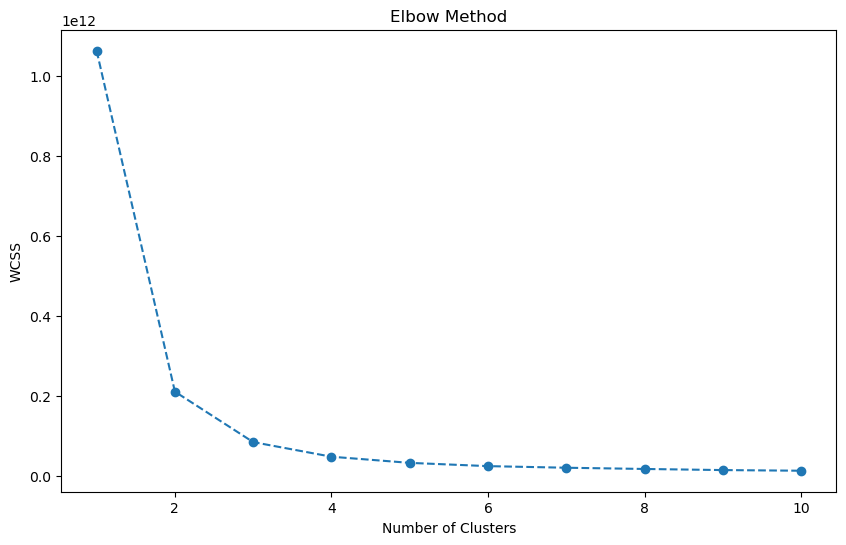

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
df['Cluster'] = clusters

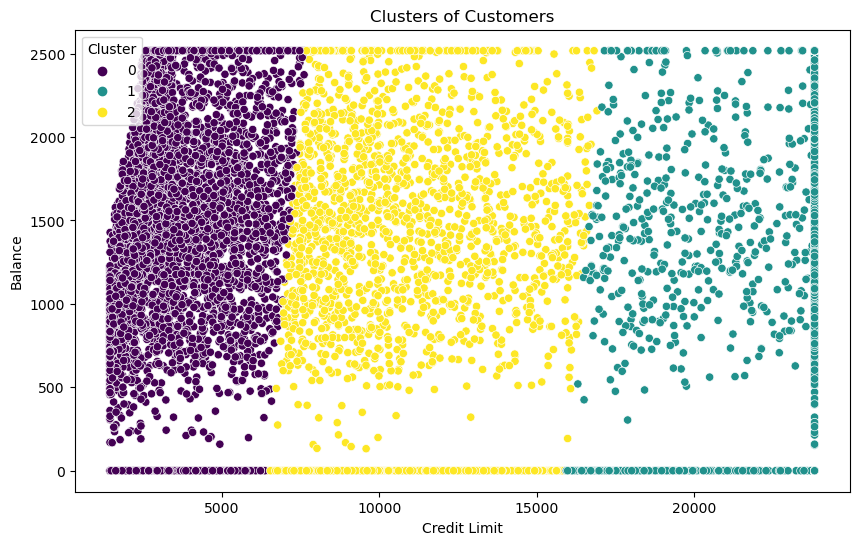

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credit_Limit', y='Total_Revolving_Bal', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.show()

In [31]:
df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Cluster
0,45.0,3,39.0,5,1.0,3.0,12691.0,777,11914.0,1.201,...,False,False,True,False,False,False,False,False,False,2
1,49.0,5,44.0,6,1.0,2.0,8256.0,864,7392.0,1.201,...,False,False,False,False,True,False,False,False,False,2
2,51.0,3,36.0,4,1.0,0.5,3418.0,0,3418.0,1.201,...,False,False,False,True,False,False,False,False,False,0
3,40.0,4,34.0,3,4.0,1.0,3313.0,2517,796.0,1.201,...,True,False,False,False,True,False,False,False,False,0
4,40.0,3,21.0,5,1.0,0.5,4716.0,0,4716.0,1.201,...,False,False,True,False,False,False,False,False,False,0


## Part 4: Predictive Modeling
- Churn Prediction: 
    - Build a predictive model to forecast customer churn based on the features available in the dataset. 
    - Experiment with at least two different algorithms and compare their performance.
- Model Evaluation: 
    - Assess the models using appropriate performance metrics. 
    - Discuss the strengths and weaknesses of each model.

In [33]:
df.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Cluster
Customer_Age,1.000000,-0.122147,0.787989,-0.010966,0.052163,-0.018494,0.002699,0.014778,0.000851,-0.070923,...,-0.026679,-0.013918,-0.017843,0.005413,-0.002558,-0.002239,-0.011896,6.519611e-03,-0.019411,-0.001274
Dependent_count,-0.122147,1.000000,-0.106605,-0.039076,-0.010415,-0.042982,0.063830,-0.002688,0.064203,-0.033191,...,0.041743,-0.013493,0.028975,0.047611,-0.046785,-0.019205,0.027035,3.554927e-03,0.017322,0.038290
Months_on_book,0.787989,-0.106605,1.000000,-0.009707,0.071422,-0.008617,0.007977,0.008326,0.006756,-0.055963,...,-0.025586,-0.003971,-0.017047,0.007256,-0.005043,-0.005801,-0.006168,1.743203e-03,-0.014328,0.009733
Total_Relationship_Count,-0.010966,-0.039076,-0.009707,1.000000,-0.004254,0.065801,-0.063668,0.013726,-0.065233,0.042785,...,-0.009376,-0.008747,0.005475,0.001185,0.005109,0.000490,-0.055678,-4.328912e-02,-0.060566,-0.037149
Months_Inactive_12_mon,0.052163,-0.010415,0.071422,-0.004254,1.000000,0.029531,-0.019091,-0.045552,-0.014572,-0.028116,...,-0.008423,-0.022301,-0.004073,-0.004501,0.017274,0.011790,-0.004580,-3.129395e-03,-0.014025,-0.012333
Contacts_Count_12_mon,-0.018494,-0.042982,-0.008617,0.065801,0.029531,1.000000,0.019065,-0.050228,0.023998,-0.020256,...,-0.010958,-0.001113,-0.000022,0.013413,-0.020386,-0.000050,-0.004221,1.807178e-03,-0.003330,0.017052
Credit_Limit,0.002699,0.063830,0.007977,-0.063668,-0.019091,0.019065,1.000000,0.046411,0.994238,0.015127,...,0.027021,-0.155446,0.122580,0.339914,-0.421235,0.047061,0.204458,8.866363e-02,0.401143,0.598345
Total_Revolving_Bal,0.014778,-0.002688,0.008326,0.013726,-0.045552,-0.050228,0.046411,1.000000,-0.055839,0.051160,...,-0.001756,0.005220,-0.003847,0.022776,-0.015974,-0.020578,0.023974,5.738860e-03,0.012799,-0.010050
Avg_Open_To_Buy,0.000851,0.064203,0.006756,-0.065233,-0.014572,0.023998,0.994238,-0.055839,1.000000,0.009522,...,0.026722,-0.156077,0.122938,0.337060,-0.419177,0.049281,0.203425,8.873092e-02,0.400326,0.599028
Total_Amt_Chng_Q4_Q1,-0.070923,-0.033191,-0.055963,0.042785,-0.028116,-0.020256,0.015127,0.051160,0.009522,1.000000,...,-0.008152,0.002197,0.013900,0.006501,-0.018444,0.009634,0.006910,6.921607e-03,0.007406,0.001083


In [34]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Attrition_Flag_Existing Customer'])
y = df['Attrition_Flag_Existing Customer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

### Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_s, y_train)
y_pred_lr = clf_lr.predict(X_test_s)

In [38]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
confusion_matrix(y_test,y_pred_lr)

array([[ 192,  135],
       [  61, 1638]], dtype=int64)

In [39]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))
print('Logistic AUC Score:', roc_auc_score(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.59      0.66       327
        True       0.92      0.96      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.84      0.78      0.80      2026
weighted avg       0.90      0.90      0.90      2026

Logistic AUC Score: 0.7756262453358964


### XGB Classifier

In [41]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier(random_state=42)
xgbmodel.fit(X_train_s, y_train)
xgb_pred = xgbmodel.predict(X_test_s)

In [42]:
confusion_matrix(y_test,xgb_pred)

array([[ 288,   39],
       [  33, 1666]], dtype=int64)

In [43]:
print('XGB Classification Report:')
print(classification_report(y_test, xgb_pred))
print('XGB AUC Score:', roc_auc_score(y_test, xgb_pred))

XGB Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.88      0.89       327
        True       0.98      0.98      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

XGB AUC Score: 0.930655377421149


## Conclusion

- XGB model given the good accuracy